In [36]:
using NCDatasets
using Glob
using DIVAnd
using Dates
using PyPlot
const plt = PyPlot

PyPlot

In [2]:
datadir = "/home/ctroupin/data/ME4OH/data/en4.1.1/1979-2014/full/update"
datafilelist = Glob.glob("*.nc", datadir)

1-element Vector{String}:
 "/home/ctroupin/data/ME4OH/data/" ⋯ 55 bytes ⋯ "f.profiles.g10.197901.update.nc"

In [28]:
function read_me4oh_profiles(datafile::AbstractString)
   NCDataset(datafile, "r") do ds
        #print(ds)
        lon = ds["ts_lon"][:]
        lat = ds["ts_lat"][:]
        en4_ymd = ds["en4_ymd"][:]
        depth = ds["ts_z"][:]
        depth_thickness = ds["ts_dz"][:]
        thedates = Dates.Date.(en4_ymd[1,:], en4_ymd[2,:], en4_ymd[3,:])
        return lon::Vector{Float32}, lat::Vector{Float32}, thedates::Vector{Date}, depth::Vector{Float32},
        depth_thickness::Vector{Float32}
    end 
    
end

read_me4oh_profiles (generic function with 1 method)

In [29]:
for datafile in datafilelist
    lon, lat, dates = read_me4oh_profiles(datafile)
end

In [37]:
lon, lat, dates, depth, depth_thickness = read_me4oh_profiles(datafilelist[1]);

In [31]:
depth

51-element Vector{Float32}:
    2.5
    7.5
   12.5
   17.51539
   22.66702
   28.16938
   34.218006
   40.954975
   48.454975
   56.718006
   65.66938
   75.16702
   85.01539
    ⋮
 1115.3134
 1238.3539
 1368.1575
 1507.7339
 1658.1575
 1818.3539
 1985.3134
 2165.1802
 2431.101
 2894.8418
 3603.101
 4509.18

In [24]:
depth_thickness

51-element Vector{Float32}:
   5.0
   5.0
   5.007695
   5.0835104
   5.326994
   5.7754936
   6.3927975
   7.1184845
   7.8815155
   8.607204
   9.224503
   9.673004
   9.916496
   ⋮
 121.42139
 126.42212
 134.68994
 145.0
 155.31006
 163.57788
 173.41321
 222.8938
 364.8308
 586.0
 807.1692
 943.8594

## Create grid, mask etc

In [33]:
deltalon = 1.0
deltalat = 1.0
longrid = 20.5:deltalon:379.5
latgrid = -80.:deltalat:80.

lon[lon .<= 20.] .+= 360.

-80.0:1.0:80.0

In [34]:
bath_name = "/home/ctroupin/Projects/Diva-Workshops/notebooks/data/gebco_30sec_16.nc"
xi, yi, mask = DIVAnd.load_mask(bath_name, true, longrid, latgrid, depth)

(20.5:1.0:379.5, -80.0:1.0:80.0, [0 0 … 0 0; 0 0 … 1 0; … ; 0 0 … 0 0; 0 0 … 0 0;;; 0 0 … 0 0; 0 0 … 1 0; … ; 0 0 … 0 0; 0 0 … 0 0;;; 0 0 … 0 0; 0 0 … 1 0; … ; 0 0 … 0 0; 0 0 … 0 0;;; … ;;; 0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0;;; 0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0;;; 0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0])

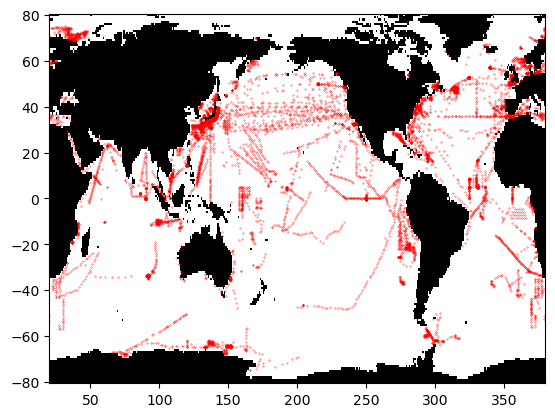

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7f24b85a0a00>

In [50]:
plt.pcolormesh(longrid, latgrid, mask[:,:,1]', cmap=plt.cm.binary_r)
plt.plot(lon, lat, "ro", ms=.25)

In [52]:
mask, (pm, pn), (xi, yi) = DIVAnd_rectdom(longrid, latgrid)

(Bool[1 1 … 1 1; 1 1 … 1 1; … ; 1 1 … 1 1; 1 1 … 1 1], ([1.0 1.0 … 1.0 1.0; 1.0 1.0 … 1.0 1.0; … ; 1.0 1.0 … 1.0 1.0; 1.0 1.0 … 1.0 1.0], [1.0 1.0 … 1.0 1.0; 1.0 1.0 … 1.0 1.0; … ; 1.0 1.0 … 1.0 1.0; 1.0 1.0 … 1.0 1.0]), ([20.5 20.5 … 20.5 20.5; 21.5 21.5 … 21.5 21.5; … ; 378.5 378.5 … 378.5 378.5; 379.5 379.5 … 379.5 379.5], [-80.0 -79.0 … 79.0 80.0; -80.0 -79.0 … 79.0 80.0; … ; -80.0 -79.0 … 79.0 80.0; -80.0 -79.0 … 79.0 80.0]))

In [ ]:
## Set parameters

In [ ]:
#   We will use the function diva3D for the calculations. With this function,
#   the correlation length has to be defined in meters, not in degrees.

sz = (length(lonr),length(latr),length(depthr));
lenx = fill(100_000.,sz)   # 100 km
leny = fill(100_000.,sz)   # 100 km
lenz = fill(25.,sz);      # 25 m
len = (lenx, leny, lenz);
epsilon2 = 0.1;
#epsilon2 = epsilon2 * rdiag;


In [ ]:
@time dbinfo = diva3d((lonr,latr,depthr,TS),
    (obslon,obslat,obsdepth,obstime), obsval,
    len, epsilon2,
    filename,varname,
    bathname=bathname,
    plotres = plotres,
    mask = mask_edit,
    fitcorrlen = false,
    niter_e = 2,
    ncvarattrib = ncvarattrib,
    ncglobalattrib = ncglobalattrib,
    surfextend = true
    );
